In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the data table for preview
combined_mousestudy_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')

# sorting by mouse id  
combined_mousestudy_df.sort_values(["Mouse ID", "Timepoint"], inplace = True) 
      
# dropping ALL duplicte values 
combined_data_clean = combined_mousestudy_df.drop_duplicates(subset =["Mouse ID", "Timepoint"], 
                keep = False, inplace =True) 
 
#Display data
# combined_mousestudy_df["Tumor Volume (mm3)"] = combined_mousestudy_df["Tumor Volume (mm3)"].map('{:,.2f}'.format)
print(combined_data_clean)

None


In [ ]:
# Summary statistics table 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen

tumor_volume = combined_mousestudy_df.groupby(["Tumor Volume (mm3)"])

tumor_volume_avg = tumor_volume.mean()
tumor_volume_median = tumor_volume.median()
tumor_volume_variance = tumor_volume.var()
tumor_volume_standev = tumor_volume.std()
tumor_volume_sem = tumor_volume.sem()

Summary_tumor_volume = pd.DataFrame({'Avg Tumor Volume': [tumor_volume_avg], 'Mediam Tumor Volume': [tumor_volume_median], 
                                     'Variance': [tumor_volume_variance], 'Standard Deviation': [tumor_volume_standev], 
                                     'Standard Error of Mean': [tumor_volume_sem]})
Summary_tumor_volume

In [ ]:
# Summary statistics table 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen

tumor_volume_avg = combined_mousestudy_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = combined_mousestudy_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = combined_mousestudy_df["Tumor Volume (mm3)"].var()
tumor_volume_standev = combined_mousestudy_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = combined_mousestudy_df["Tumor Volume (mm3)"].sem()

Summary_tumor_volume = pd.DataFrame({'Avg Tumor Volume': [tumor_volume_avg], 'Mediam Tumor Volume': [tumor_volume_median], 
                                     'Variance': [tumor_volume_variance], 'Standard Deviation': [tumor_volume_standev], 
                                     'Standard Error of Mean': [tumor_volume_sem]})
Summary_tumor_volume



Summary_tumor_volume = pd.DataFrame(columns = ['Avg Tumor Vol', 'Mediam Tumor Vol', 'TumorvVol Variance', 
                                            'Tumor Vol Standard Deviation', 'Tumor Vol Standard Error of Mean'],
                                    index = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
                                               'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'])
    
Summary_tumor_volume.loc["Infubinol"] = 

In [4]:
combined_mousestudy_df["Drug Regimen"].unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [19]:
#Grab the top 4 regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) 
top_regimens = combined_mousestudy_df[combined_mousestudy_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens = top_regimens.sort_values(["Timepoint"], ascending=True)
top_regimens

top_regimens_data = top_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regimens_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
454,Infubinol,a203,0,45.000000
290,Capomulin,b742,0,45.000000
1637,Infubinol,v766,0,45.000000
411,Ramicane,q597,0,45.000000
595,Ceftamin,b487,0,45.000000
...,...,...,...,...
234,Ramicane,r811,45,37.225650
800,Infubinol,e476,45,62.435404
1773,Ceftamin,x581,45,64.634949
144,Capomulin,m957,45,33.329098


Text(0.5, 0, 'Drug Regimen')

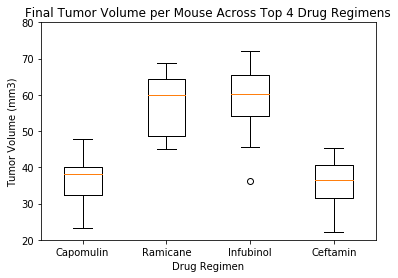

In [20]:
#Group the data by both Drug Regimen and Mouse ID and get the final tumor measurement
top_regimens_sort = top_regimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

# put above data into dataframe for future manipulation
top_regimen_df = top_regimens_sort.to_frame()
top_regimen_df

# Create treatments list for for loop (and later for plot labels) 
top_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']



#reset the index for final 4 drugs of interest
final_drug_df = top_regimen_df.reset_index()

# Create a tumor drug regimen list with tumor volume for plotting
list_of_tumor_drugs = final_drug_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list_of_tumor_drugs

#Turn the list into a dataframe for manipulation
final_list_of_tumor_drugs = pd.DataFrame(list_of_tumor_drugs)


# Generate a box plot of the final tumor volume of each mouse across the top four drug regimens
tumor_volumes = [volume for volume in final_list_of_tumor_drugs['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=top_drugs)
plt.ylim(20, 80)
plt.title("Final Tumor Volume per Mouse Across Top 4 Drug Regimens")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mice_by_timepoint = combined_mousestudy_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
#max_timepoint = mice_by_timepoint["Timepoint"].max()
mice_by_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
454,a203,Infubinol,0,45.000000
455,a203,Infubinol,5,48.508468
456,a203,Infubinol,10,51.852437
457,a203,Infubinol,15,52.777870
458,a203,Infubinol,20,55.173336
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [14]:
drug_reg = combined_mousestudy_df.groupby("Drug Regimen")



In [15]:
type(drug_reg)

pandas.core.groupby.generic.DataFrameGroupBy

In [16]:
drug_reg.describe().head()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  

[5 rows x 40 columns]